In [2]:
# reading csv files
# cleaning

import os
import glob
import pandas as pd

class ReadCSV:
    # Initialising class with parent directory
    def __init__(self, parent_dir): 
        self.parent_dir = parent_dir
        os.chdir(parent_dir)
        self.folder = os.path.join(self.parent_dir) # folder where data retrieve are stored

    # Turning csvs to dataframe, each csv as an item in a list
    def list_of_dfs(self): 
        maindfs = []
        monthdfs = []
        os.chdir(self.folder +'/data')
        for file_name in glob.glob('*.csv'):
            month = file_name.split("- ")[1].split(".")[0] #getting the month from the csv file name
            x = pd.read_csv(file_name, header=1,engine='python', skipfooter =4) #making the first row the header 
            x.dropna(how='all', axis=1, inplace=True) #drop empty columns
            x["Month"] = month #getting the month into a column, with header "Month"
            num_lines = len(x)
            y = pd.read_csv(file_name, header = 1, engine='python', skiprows=range(0,num_lines+3))
            y.dropna(how='all', axis=1, inplace=True) #drop empty columns
            y["Month"] = month #getting the month into a column, with header "Month"
            y.rename(columns={'Event ID': 'Total Events'}, inplace=True) #rename column
            maindfs.append(x)
            monthdfs.append(y)
        return maindfs, monthdfs #list of csvs

    # Turning all the indv month dataframes into one big data frame
    def merged_dfs(self): 
        maindfs, monthdfs  = self.list_of_dfs()
        mainmergeddf  = pd.concat(maindfs)
        monthmergeddf = pd.concat(monthdfs)
        return mainmergeddf, monthmergeddf
    
    def download_mergedfiles(self):
        maindf, summarydf = self.merged_dfs()
        filename = "daily_run_sheets.csv"
        maindf.to_csv(os.path.join(self.folder, filename), index=False)
        filename = "summary.csv"
        summarydf.to_csv(os.path.join(self.folder, filename), index=False)



In [3]:

class Main:
    def __init__(self):
        return
    
    def get_dataframe(self, parentdir):
        csvs = ReadCSV(parentdir)
        return csvs.merged_dfs()
    
    def download_mergedfiles(self, parentdir):
        csvs = ReadCSV(parentdir)
        return csvs.download_mergedfiles()

# Getting data
directory = "/Users/rebecca/predicting-food-waste" #put your own directory here
main = Main()
data, summary = main.get_dataframe(directory) 
main.download_mergedfiles(directory)

In [4]:
#Data Exploration
#First 5 rows
data.head() 

,Event ID,Guest Count,Building Room,Street Address,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month
0,143732,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022
1,143733,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Antonio,NO P/U,NaN,September 2022
2,143734,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022
3,143735,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022
4,143736,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022


In [159]:
#Number of rows
len(data) #5333

5285

In [160]:
#Total events per month
summary.head()

,Total Events,Guest Count,Month
0,553,"64,251.00",September 2022
0,560,"88,535.00",May 2022
0,664,"37,193.00",April 2022
0,477,"41,525.00",July 2022
0,126,"6,187.00",January 2022


In [5]:

# Groups function to check if all the street addresses are the same
def groups_count(data, column, download):
    groups = pd.DataFrame()
    groups['Count'] = data.groupby([column])[column].count()
    groups = groups.reset_index().sort_values(by = 'Count',ascending=False)
    if download == True:
        filename = column +".csv"
        groups.to_csv(os.path.join(directory, filename), index=False)
    return groups

#example
groups_count(data, 'Street Address', False) #false so it doesnt download the file


,Street Address,Count
325,775 Comm Ave,836
304,765 Comm Ave,350
214,610 Comm Ave,177
352,8 St Marys,176
199,580 Comm Ave,152
...,...,...
310,765 Comm ve,1
92,"15 St. Mary’s Street, EMB 105",1
312,765 Comm. Ave.,1
91,15 St. Marys St,1


In [6]:
#Data Cleaning, Changing street addresses

data['Street Address'] = data['Street Address'].str.upper().str.strip().str.replace('.', '')

groups_count(data, 'Street Address', False)

/var/folders/9g/mmlvj2fj23x6r6tr77txfdvc0000gn/T/ipykernel_82828/3934811634.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Street Address'] = data['Street Address'].str.upper().str.strip().str.replace('.', '')


,Street Address,Count
234,775 COMM AVE,886
223,765 COMM AVE,365
246,8 ST MARYS,198
166,610 COMM AVE,194
156,580 COMM AVE,152
...,...,...
20,100 BAY STATE RD,1
118,273 BABCOCK ST,1
236,775 COMMONWEALLTH AVENUE,1
235,775 COMM AVE-,1


In [148]:
#Adding Duration (in minutes)

#data["Duration"] = data["End Time"] - data["Event Start Time"] 


In [7]:
# Most frequently 1 guest only
groups_count(data, 'Guest Count', False)

,Guest Count,Count
0,1,711
14,15,367
29,30,308
47,50,293
19,20,288
...,...,...
142,475,1
55,61,1
144,525,1
79,96,1


In [8]:
# Types of tiers
groups_count(data, 'Tier', False)

,Tier,Count
5,1,3641
6,2,581
1,1.0,335
7,3,228
8,CTG,194
4,0,141
2,2.0,101
0,0.0,37
3,3.0,21


In [14]:
# Checking frequency of different supply times
groups_count(data, 'SuppliesTime', False)

,SuppliesTime,Count
7,11:15 AM,433
64,9:00 AM,266
47,6:30 AM,222
0,0,215
29,4:00 PM,206
...,...,...
5,10:45 PM,1
21,2:45 AM,1
24,3:15 AM,1
27,3:45 AM,1


In [16]:
# Checking frequency of different food times
groups_count(data, 'Food Time', False)

,Food Time,Count
7,11:15 AM,441
0,0,238
67,9:00 AM,233
49,6:30 AM,204
6,11:00 AM,200
...,...,...
8,11:15 PM,1
37,5:00 AM,1
2,10:00 PM,1
27,3:15 AM,1


In [9]:
#Checking if there are cols with NA values
check = pd.DataFrame()
check["ISNA"] = data["Guest Count"].isna()
groups_count(check, 'ISNA', False)


check = pd.DataFrame()
check["ISNA"] = data["Event ID"].isna()
groups_count(check, 'ISNA', False)

check = pd.DataFrame()
check["ISNA"] = data["Event Start Time"].isna()
groups_count(check, 'ISNA', False)

check = pd.DataFrame()
check["ISNA"] = data["End Time"].isna()
groups_count(check, 'ISNA', False)

,ISNA,Count
0,False,5284
1,True,1


In [10]:
data[data['End Time'].isnull()]


,Event ID,Guest Count,Building Room,Street Address,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month
358,140477,1,Hillel Kitchen,213 BAY STATE RD,1:30 PM,1:30 PM,1:30 PM,NaN,CTG,Luis,NaN,NaN,March 2022


In [11]:
#Checking if there are cols with NA values
check = pd.DataFrame()
check["ISNA"] = data["Tier"].isna()
groups_count(check, 'ISNA', False)

,ISNA,Count
0,False,5279
1,True,6


In [13]:
data[data['Tier'].isnull()]


,Event ID,Guest Count,Building Room,Street Address,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month
188,142407,25000,NaN,VARIOUS,NaN,NaN,10:15 AM,12:01:30 AM,NaN,NaN,NaN,NaN,May 2022
462,141360,25,Pastry Bench,775 COMM AVE,NaN,NaN,3:00 PM,12:01:30 AM,NaN,NaN,NaN,NaN,April 2022
71,139097,40,GSU Small Ballroom,775 COMM AVE,7:15 AM,7:15 AM,8:00 AM,12:01:30 AM,NaN,NaN,NaN,NaN,March 2022
199,139207,60,NaN,15 ST MARYS,NaN,NaN,10:30 AM,12:01:30 AM,NaN,NaN,NaN,NaN,March 2022
163,138869,48,4th floor,1010 COMM AVE,NaN,NaN,2:00 PM,12:01:30 AM,NaN,NaN,NaN,NaN,February 2022
476,142653,1,Various,775 COMM AVE,NaN,NaN,7:00 PM,12:01:30 AM,NaN,NaN,NaN,NaN,June 2022


In [20]:
no_drop = data[data['Drop Steward'].isnull()]


,Event ID,Guest Count,Building Room,Street Address,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month
109,144369,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,No P/U,NaN,September 2022
113,144368,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,No P/U,NaN,September 2022
117,145958,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,NaN,NaN,September 2022
118,144370,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,NaN,NaN,September 2022
121,144371,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,NaN,NaN,September 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,145965,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,NaN,NaN,November 2022
131,145967,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,NaN,NaN,November 2022
132,144379,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,NaN,NaN,November 2022
134,145966,24,PICK UP @ Einstein,725 COMM AVE,9:15 AM,9:15 AM,9:30 AM,11:00 AM,1,NaN,NaN,NaN,November 2022


In [22]:
no_drop = data[data['Drop Steward'].isnull()]
groups_count(no_drop, 'Pick Up Steward', False)


,Pick Up Steward,Count
5,No P/U,6
0,Jordan,2
4,NO P/U,2
1,Jose,1
2,Juan,1
3,N/A,1


In [26]:
no_pick = data[data['Pick Up Steward'].isnull()]
groups_count(data, 'Drop Steward', False)


,Drop Steward,Count
71,Luis,843
2,Antonio,698
88,Romero,631
97,Sammy,626
48,Jose,592
...,...,...
32,Elvin,1
29,Conor,1
27,Claudia/Jose from Panda,1
26,Claudia,1


In [165]:
data.dtypes


Event ID             int64
Guest Count          int64
Building Room       object
Street Address      object
SuppliesTime        object
Food Time           object
Event Start Time    object
End Time            object
Tier                object
Drop Steward        object
Pick Up Steward     object
Event Manager       object
Month               object
dtype: object

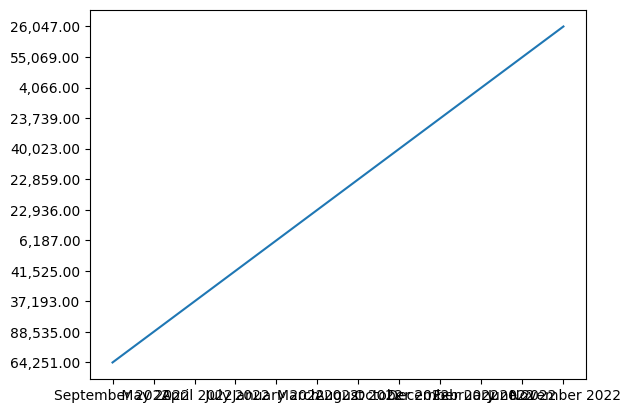

In [19]:
#plot summary data

#import matplotlib.pyplot as plt

#y = summary["Guest Count"]
#x = summary["Month"]

#plt.plot(x, y)
#plt.show()